<a href="https://colab.research.google.com/github/Syleshkumar1996/Time-series-forecasting-of-online-search-popularity/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
from statsmodels.tsa.stattools import adfuller

**Dataset**

In [ ]:
df_craft_Beer = pd.read_excel('7B21E009.xlsx',sheet_name = "CraftBeer")
df_craft_Beer.rename(columns = {'Relative Interest':'Craft Beer'}, inplace = True)
df_craft_Beer['time_period']=df_craft_Beer['Year'].astype('str') + '-' + df_craft_Beer['Month'].astype('str')
df_craft_Beer['time_period']=pd.to_datetime(df_craft_Beer['time_period'])
df_craft_Beer.drop(columns=['Year','Month'],axis=1,inplace=True)
df_craft_Beer

,Craft Beer,time_period
0,6,2010-01-01
1,9,2010-02-01
2,15,2010-03-01
3,12,2010-04-01
4,17,2010-05-01
...,...,...
67,84,2015-08-01
68,75,2015-09-01
69,66,2015-10-01
70,66,2015-11-01


In [ ]:
df_Whiskey = pd.read_excel('7B21E009.xlsx',sheet_name = "Whiskey")
df_Whiskey.rename(columns = {'Relative Interest':'Whiskey'}, inplace = True)
df_Whiskey['time_period']=df_Whiskey['Year'].astype('str') + '-' + df_Whiskey['Month'].astype('str')
df_Whiskey['time_period']=pd.to_datetime(df_Whiskey['time_period'])
df_Whiskey.drop(columns=['Year','Month'],axis=1,inplace=True)
df_Whiskey

,Whiskey,time_period
0,41,2010-01-01
1,42,2010-02-01
2,44,2010-03-01
3,41,2010-04-01
4,39,2010-05-01
...,...,...
67,69,2015-08-01
68,63,2015-09-01
69,65,2015-10-01
70,87,2015-11-01


In [ ]:
df_White_Wine = pd.read_excel('7B21E009.xlsx',sheet_name = "WhiteWine")
df_White_Wine.rename(columns = {'Relative Interest':'White wine'}, inplace = True)
df_White_Wine['time_period']=df_White_Wine['Year'].astype('str') + '-' + df_White_Wine['Month'].astype('str')
df_White_Wine['time_period']=pd.to_datetime(df_White_Wine['time_period'])
df_White_Wine.drop(columns=['Year','Month'],axis=1,inplace=True)
df_White_Wine

,White wine,time_period
0,54,2010-01-01
1,54,2010-02-01
2,58,2010-03-01
3,52,2010-04-01
4,61,2010-05-01
...,...,...
67,81,2015-08-01
68,72,2015-09-01
69,70,2015-10-01
70,83,2015-11-01


In [ ]:
df=pd.merge(pd.merge(df_craft_Beer,df_Whiskey,on='time_period'),df_White_Wine,on='time_period')
df

,Craft Beer,time_period,Whiskey,White wine
0,6,2010-01-01,41,54
1,9,2010-02-01,42,54
2,15,2010-03-01,44,58
3,12,2010-04-01,41,52
4,17,2010-05-01,39,61
...,...,...,...,...
67,84,2015-08-01,69,81
68,75,2015-09-01,63,72
69,66,2015-10-01,65,70
70,66,2015-11-01,87,83


In [ ]:
df2=df.set_index('time_period')
df2

,Craft Beer,Whiskey,White wine
time_period,,,
2010-01-01,6,41,54
2010-02-01,9,42,54
2010-03-01,15,44,58
2010-04-01,12,41,52
2010-05-01,17,39,61
...,...,...,...
2015-08-01,84,69,81
2015-09-01,75,63,72
2015-10-01,66,65,70


**Dataset analysis**

In [ ]:
df2.describe()

,Craft Beer,Whiskey,White wine
count,72.000000,72.000000,72.000000
mean,43.722222,60.430556,72.694444
std,24.405161,13.787958,9.181486
min,6.000000,36.000000,50.000000
25%,22.000000,51.750000,67.000000
50%,43.000000,60.500000,73.000000
75%,66.000000,67.000000,79.000000
max,100.000000,100.000000,100.000000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2010-01-01 to 2015-12-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Craft Beer  72 non-null     int64
 1   Whiskey     72 non-null     int64
 2   White wine  72 non-null     int64
dtypes: int64(3)
memory usage: 2.2 KB


 **Visual representation of the dataset**

In [ ]:
column_header=list(df2.columns)
column_header

['Craft Beer', 'Whiskey', 'White wine']

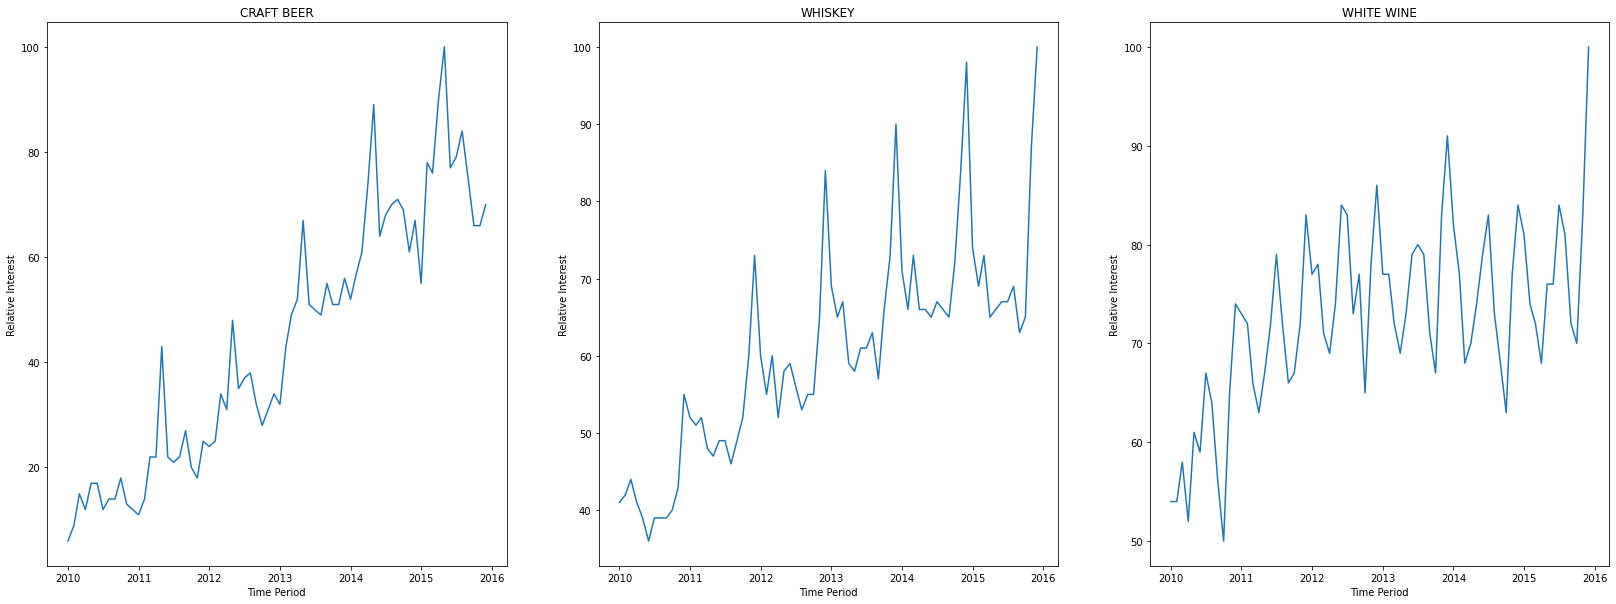

In [ ]:
fig,axis=plt.subplots(1,3,figsize=(28,10))
for i in range(0,len(column_header)):
 axis[i].plot(df2.index,df2.iloc[:,[i]])
 axis[i].set(title=column_header[i].upper(),xlabel="Time Period",ylabel="Relative Interest")

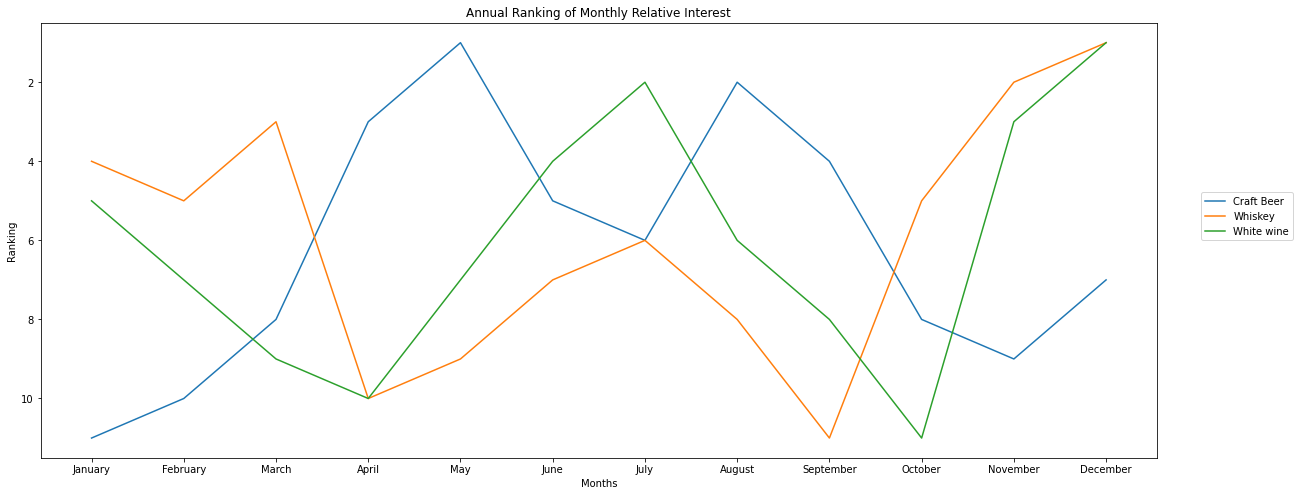

In [ ]:
df4=df.copy()
df4['month']=  df4['time_period'].dt.month
df4['year']=  df4['time_period'].dt.year
df4["Craft_beer_monthly_Rank"] = df4.groupby("year")["Craft Beer"].rank(method="dense", ascending=False)
df4["Whiskey_monthly_Rank"] = df4.groupby("year")["Whiskey"].rank(method="dense", ascending=False)
df4["White wine_monthly_Rank"] = df4.groupby("year")["White wine"].rank(method="dense", ascending=False)
df5=df4.groupby(['month']).aggregate({'Craft_beer_monthly_Rank':'mean','Whiskey_monthly_Rank':'mean','White wine_monthly_Rank':'mean'}).reset_index()
df5["Craft_beer_Relative_Monthly_Rank"] = df5["Craft_beer_monthly_Rank"].rank(method="dense", ascending=True)
df5["Whiskey_Relative_Monthly_Rank"] = df5["Whiskey_monthly_Rank"].rank(method="dense", ascending=True)
df5["White_wine_Relative_Monthly_Rank"] = df5["White wine_monthly_Rank"].rank(method="dense", ascending=True)
fig,axes=plt.subplots(figsize=(20,8))
axes.plot(df5['month'],df5['Craft_beer_Relative_Monthly_Rank' ])
axes.plot(df5['month'],df5['Whiskey_Relative_Monthly_Rank' ])
axes.plot(df5['month'],df5['White_wine_Relative_Monthly_Rank' ])
plt.gca().invert_yaxis()  
plt.xlabel("Months")
months = [x for x in calendar.month_name if x]
plt.xticks(df5['month'],months)
plt.ylabel('Ranking')
plt.title("Annual Ranking of Monthly Relative Interest")
plt.legend(["Craft Beer","Whiskey","White wine"],loc=(1.04,0.5))
plt.show()

**Augmented Dickey–Fuller test**

In [ ]:
for i in range(0,len(column_header)):
 result=adfuller(df2.iloc[:,[i]])
 print(column_header[i].upper(),":")
 print("p-value",result[1])
 if result[1]<=0.05:
   print("Result of hypothesis testing:Reject Null hypothesis.The data series is stationary")
 else:
   print("Result of hypothesis testing:Fail to reject Null hypothesis.The data series is not stationary")
      

CRAFT BEER :
p-value 0.9571859840134868
Result of hypothesis testing:Fail to reject Null hypothesis.The data series is not stationary
WHISKEY :
p-value 0.03568262822665989
Result of hypothesis testing:Reject Null hypothesis.The data series is stationary
WHITE WINE :
p-value 0.47271892803067794
Result of hypothesis testing:Fail to reject Null hypothesis.The data series is not stationary
